In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.tokenize import TweetTokenizer
import string

In [2]:
from os import getcwd
import nltk
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
path =f"{getcwd()}/../tmp2/"
nltk.data.path.append(path)

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
print("Length of all positive tweets :" ,len(all_positive_tweets))
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
print("Length of all negative tweets : " ,len(all_negative_tweets))
tweets = all_positive_tweets + all_negative_tweets
print("Length of all tweets :" ,len(tweets)) 

Length of all positive tweets : 5000
Length of all negative tweets :  5000
Length of all tweets : 10000


In [4]:
all_positive_tweets

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [5]:
all_negative_tweets

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(",
 '@Hegelbon That heart sliding into the waste basket. :(',
 '“@ketchBurning: I hate Japanese call him "bani" :( :(”\n\nMe too',
 'Dang starting next week I have "work" :(',
 "oh god, my babies' faces :( https://t.co/9fcwGvaki0",
 '@RileyMcDonough make me smile :((',
 '@f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http://t.co/XvmTUikWln',
 'why?:("@tahuodyy: sialan:( https://t.co/Hv1i0xcrL2"',
 'Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz',
 "I have a really good m&amp;g idea but I'm never going to meet them :(((",
 '@Rampageinthebox mare ivan :(',
 '@SophiaMascardo happy trip, keep safe. see you soon :* :(',
 "I'm so tired hahahah :(",
 '@GrumpyCockney With knee replacements they get you up &amp; about the same day. :-(   Ou

In [6]:
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [7]:
text

['RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP',
 'VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY',
 'RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http://t.co…',
 'RT @GregLauder: the UKIP east lothian candidate looks about 16 and still has an msn addy http://t.co/7eIU0c5Fm1',
 "RT @thesundaypeople: UKIP's housing spokesman rakes in £800k in housing benefit from migrants.  http://t.co/GVwb9Rcb4w http://t.co/c1AZxcLh…",
 'RT @Nigel_Farage: Make sure you tune in to #AskNigelFarage tonight on BBC 1 at 22:50! #UKIP http://t.co/ogHSc2Rsr2',
 'RT @joannetallis: Ed Milliband is an embarrassment. Would you want him representing the UK?!  #bbcqt vote @Conservatives',
 "RT @abstex: The FT is backing the Tories. On an unrelated note, here's a photo of FT leader writer Jonathan Ford (next to Boris) http://t.c…",
 "RT

In [8]:
tweet_tokens

[['#FollowFriday',
  '@France_Inte',
  '@PKuchly57',
  '@Milipol_Paris',
  'for',
  'being',
  'top',
  'engaged',
  'members',
  'in',
  'my',
  'community',
  'this',
  'week',
  ':)'],
 ['@Lamb2ja',
  'Hey',
  'James',
  '!',
  'How',
  'odd',
  ':/',
  'Please',
  'call',
  'our',
  'Contact',
  'Centre',
  'on',
  '02392441234',
  'and',
  'we',
  'will',
  'be',
  'able',
  'to',
  'assist',
  'you',
  ':)',
  'Many',
  'thanks',
  '!'],
 ['@DespiteOfficial',
  'we',
  'had',
  'a',
  'listen',
  'last',
  'night',
  ':)',
  'As',
  'You',
  'Bleed',
  'is',
  'an',
  'amazing',
  'track',
  '.',
  'When',
  'are',
  'you',
  'in',
  'Scotland',
  '?',
  '!'],
 ['@97sides', 'CONGRATS', ':)'],
 ['yeaaaah',
  'yippppy',
  '!',
  '!',
  '!',
  'my',
  'accnt',
  'verified',
  'rqst',
  'has',
  'succeed',
  'got',
  'a',
  'blue',
  'tick',
  'mark',
  'on',
  'my',
  'fb',
  'profile',
  ':)',
  'in',
  '15',
  'days'],
 ['@BhaktisBanter',
  '@PallaviRuhail',
  'This',
  'one',
  '

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

print(lemmatize_sentence(tweet_tokens[0]))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


In [10]:
import re, string

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

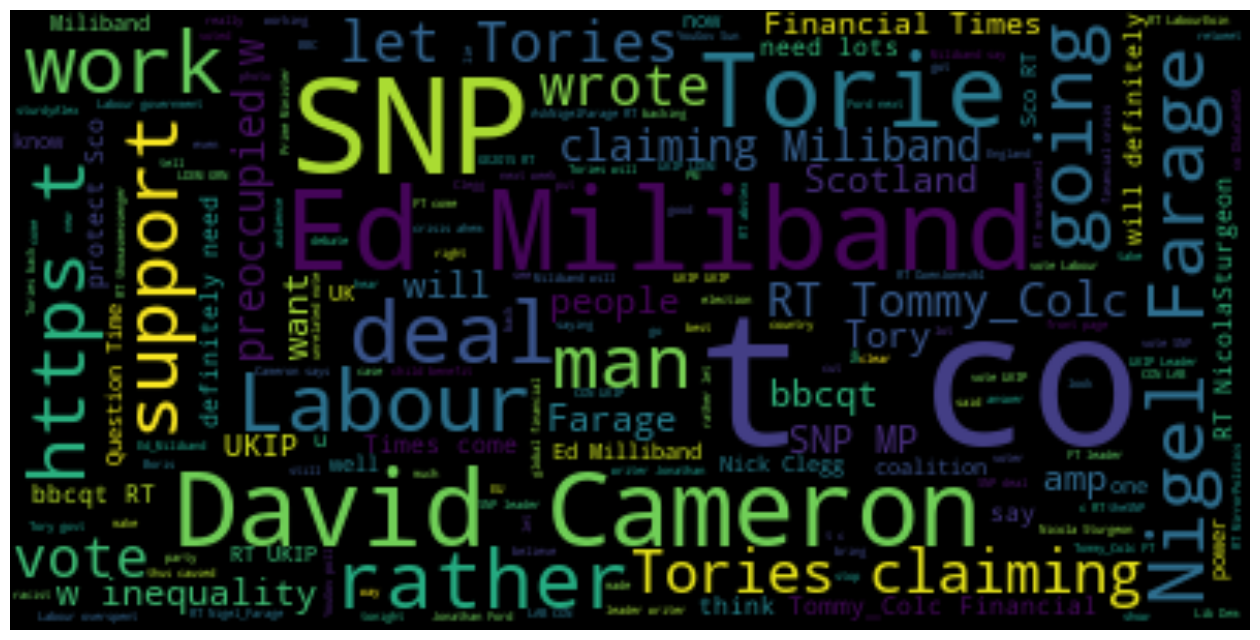

In [13]:
from wordcloud import WordCloud
cloud = WordCloud(max_font_size=60).generate(' '.join(text))
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

print(remove_noise(tweet_tokens[0], stop_words))

['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


In [15]:
positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    
print(positive_tweet_tokens[500])
print(positive_cleaned_tokens_list[500])

['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht']
['dang', 'rad', '#fanart', ':d']


In [16]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(positive_cleaned_tokens_list)
all_pos_words

<generator object get_all_words at 0x00000205BA9E0120>

In [17]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


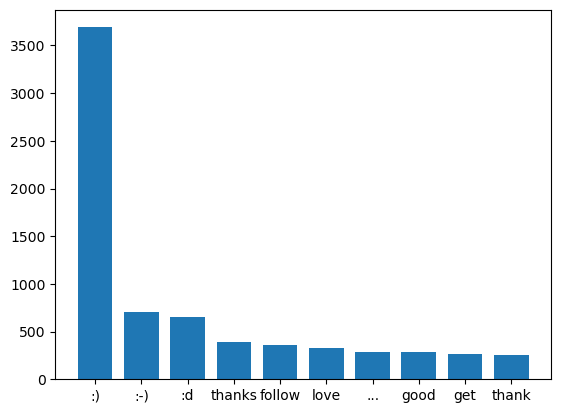

In [18]:
import matplotlib.pyplot as plt
items = freq_dist_pos.most_common(10)
labels, values = zip(*items)
width = 0.75
plt.bar(labels, values, width, align='center', )
plt.show()

In [19]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

In [20]:
import random

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_positive_tweets[4000:]
train_neg = all_positive_tweets[:4000]

In [21]:
X_train = train_pos + train_neg
X_test = test_pos + test_neg

In [22]:
y_train = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
y_test = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [23]:
train = dataset[:4000]
test = dataset[4000:]

In [24]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train)

print("Accuracy is:", classify.accuracy(classifier, test))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.9955
Most Informative Features
                      :( = True           Negati : Positi =   1181.5 : 1.0
                      :) = True           Positi : Negati =    569.5 : 1.0
                  arrive = True           Positi : Negati =     24.4 : 1.0
                   enjoy = True           Positi : Negati =     19.7 : 1.0
                     sad = True           Negati : Positi =     12.4 : 1.0
                   thank = True           Positi : Negati =     12.1 : 1.0
                   great = True           Positi : Negati =     11.6 : 1.0
              bestfriend = True           Positi : Negati =     10.4 : 1.0
                     via = True           Positi : Negati =     10.4 : 1.0
                    luck = True           Positi : Negati =      9.7 : 1.0
None


In [25]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train)

print("Accuracy is:", classify.accuracy(classifier, test))

print(classifier.show_most_informative_features(10))


Accuracy is: 0.9955
Most Informative Features
                      :( = True           Negati : Positi =   1181.5 : 1.0
                      :) = True           Positi : Negati =    569.5 : 1.0
                  arrive = True           Positi : Negati =     24.4 : 1.0
                   enjoy = True           Positi : Negati =     19.7 : 1.0
                     sad = True           Negati : Positi =     12.4 : 1.0
                   thank = True           Positi : Negati =     12.1 : 1.0
                   great = True           Positi : Negati =     11.6 : 1.0
              bestfriend = True           Positi : Negati =     10.4 : 1.0
                     via = True           Positi : Negati =     10.4 : 1.0
                    luck = True           Positi : Negati =      9.7 : 1.0
None
